## Keras Digit Demonstration

In this exercise, we will use a CNN to classify hand-written digits using Keras.

### Imports

In [0]:

import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, minmax_scale

plt.rcParams['figure.figsize'] = (15.0, 3.0)

### Install libraries we will need to visualize our DNN

In [0]:
!pip install pydot
!apt-get install -yq graphviz

    100% |████████████████████████████████| 133kB 3.6MB/s 
  Running setup.py bdist_wheel for pydot ... - done
  Stored in directory: /root/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
Successfully built pydot
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 lib

### Keras Libraries and Modules

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Input, Lambda, Concatenate
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras import backend as K
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


### Import dataset from Keras

We create a combined dataset with test and training rows.  We will features in `model.fit` to create a validation dataset later in the exercise.

Notice that the digits are 4D tensors.  The first dimension is the "row" or sample image index.  The next to dimensions are the spatial dimensions, x/y.  The last dimension is for color channels.  In this case, we have one color channels since the images are black and white.

In [0]:
(x_train_, y_train_), (x_test_, y_test_) = mnist.load_data()
X = np.vstack([x_train_,x_test_])[...,np.newaxis]
y_ = np.hstack([y_train_,y_test_])
train_ = np.hstack([y_train_*0+1,0*y_test_])
label_coder = LabelBinarizer()

label_coder.fit(y_)

Y = label_coder.transform(y_)
X.shape, Y.shape

11493376/11490434 [==============================] - 2s 0us/step


((70000, 28, 28, 1), (70000, 10))

### Plot a random row

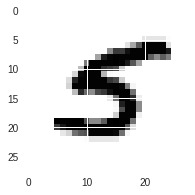

In [0]:
ind = np.random.choice(range(X.shape[0]))
plt.imshow(X[ind,...,0])

### Check the histogram of labels

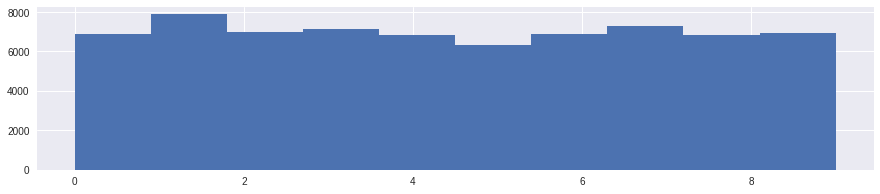

In [0]:
plt.hist(y_);

# Simple Fully Connected Model

We start with a three-layer fully-connected ANN. 

We have a categorical classification problem which means that our network should classify the image as only of the ten classes (0-9).  Because of this, we need the output activation function to be `softmax`, which approximates a probability distribution where the output layer outputs all sum to 1.

In [0]:
input_ = Input((28,28,1))

x = input_
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(100,activation='relu')(x)


x = Dense(10, activation='softmax')(x)



model = Model(input_, x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### Check the model weights

The model is initialized with random weights and can be executed before training.  Let's use Keras to examine the model weights.

#### Model layers as a list

In [0]:
model.layers

#### Model weights in the last layer

Each layer has a NxM mapping matrix of weights and M bias values.

In [0]:
model.layers[-1].weights

[<tf.Variable 'dense_3/kernel:0' shape=(100, 10) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(10,) dtype=float32_ref>]

#### Use `K.eval` to view weight values

In [0]:
# K.eval(model.layers[-1].weights[0])

#### Plot weights

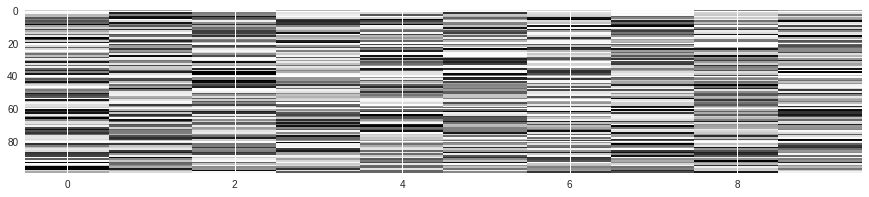

In [0]:
plt.imshow(K.eval(model.layers[-1].weights[0]),aspect='auto')

## We can also run the untrained model on the first two inputs

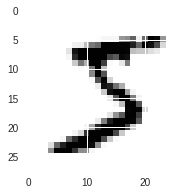

(2, 10)

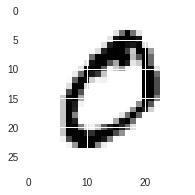

In [0]:
plt.imshow(X[0,...,0])
plt.show()
plt.imshow(X[1,...,0])
activations = model.predict(X[:2,...])

activations.shape

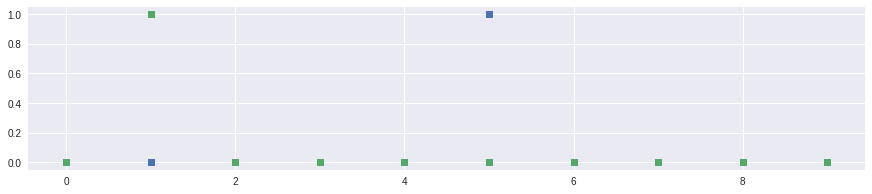

In [0]:

plt.plot(activations.T,'s')

## Train It!

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=.001),metrics=['accuracy'])
model.fit(X,Y, batch_size=400, epochs=10)

Epoch 1/10
70000/70000 [==============================] - 1s 21us/step - loss: 7.5535 - acc: 0.5222
Epoch 2/10
70000/70000 [==============================] - 1s 18us/step - loss: 5.3359 - acc: 0.6631
Epoch 3/10
70000/70000 [==============================] - 1s 17us/step - loss: 3.8167 - acc: 0.7564
Epoch 4/10
70000/70000 [==============================] - 1s 17us/step - loss: 2.4110 - acc: 0.8442
Epoch 5/10
70000/70000 [==============================] - 1s 17us/step - loss: 2.2745 - acc: 0.8536
Epoch 6/10
70000/70000 [==============================] - 1s 18us/step - loss: 2.1939 - acc: 0.8588
Epoch 7/10
70000/70000 [==============================] - 1s 17us/step - loss: 2.1891 - acc: 0.8600
Epoch 8/10
70000/70000 [==============================] - 1s 18us/step - loss: 2.1414 - acc: 0.8631
Epoch 9/10
70000/70000 [==============================] - 1s 18us/step - loss: 2.0934 - acc: 0.8665
Epoch 10/10
70000/70000 [==============================] - 1s 17us/step - loss: 2.0803 - acc: 0.8676

### Check Trained model activations

70000/70000 [==============================] - 3s 47us/step


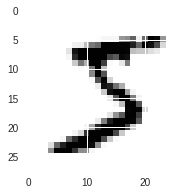

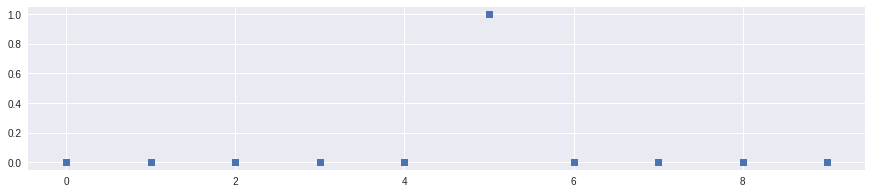

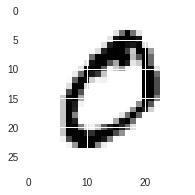

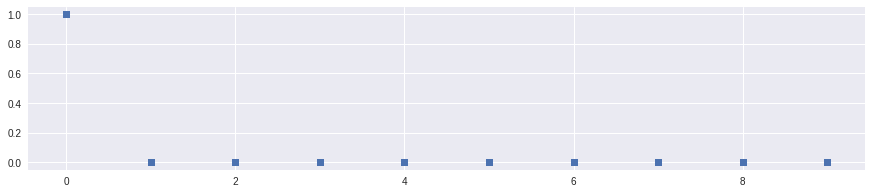

In [0]:
activations = model.predict(X, verbose=1)
plt.imshow(X[0,...,0])
plt.show()
plt.plot(activations[0,:],'s')
plt.show()
plt.imshow(X[1,...,0])
plt.show()
plt.plot(activations[1,:],'s')

Confusion matrix, without normalization


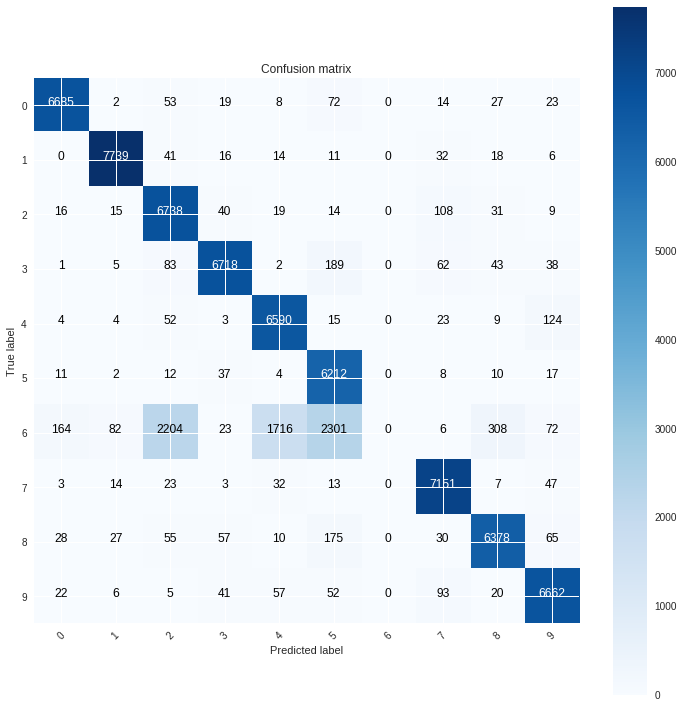

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    cm = confusion_matrix(y_test, y_pred,)
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.rcParams['figure.figsize'] = (15.0, 3.0)


plot_confusion_matrix(y_, label_coder.inverse_transform(activations), label_coder.classes_);

# CNN Model

65% accurcay is impressive for such a simple model, but it isn't really usable.  In order to make the next level of improvement, we need to use convolutional layers.

In [0]:
input_ = Input((28,28,1))

x = Conv2D(32, (3,3), activation='relu')(input_)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(100,activation='relu')(x)

x = Dense(10, activation='softmax')(x)

cnn_model = Model(input_, x)
cnn_original_weights = cnn_model.get_weights()
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 9216)              36864     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               921700    
__________

### Examine the convolution kernel values

Just as we did with the fully connected weight matrix, we can extract and visualize the weight matrix for the convolution kernals.

In [0]:
kerns = K.eval(cnn_model.layers[1].weights[0])
kerns.shape

(3, 3, 1, 32)

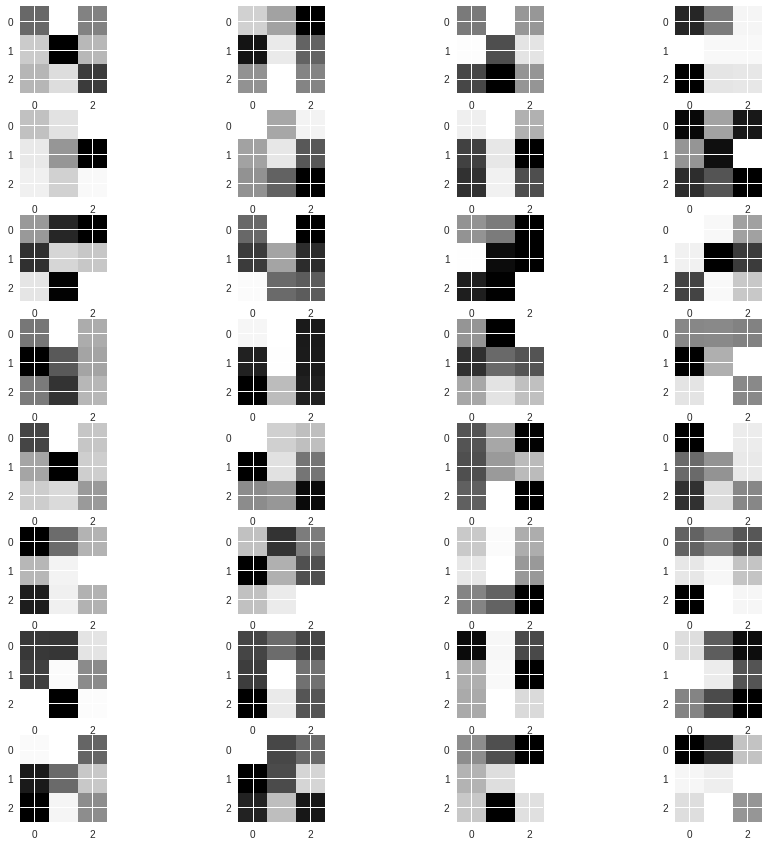

In [0]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
nrow = 8; ncol = 4;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol)

k = 0
for ax in axs.reshape(-1): 
    ax.imshow(kerns[:,:,0,k])
    k += 1

### Plot Layer Flow

We can also plot the layer flow as a SVG

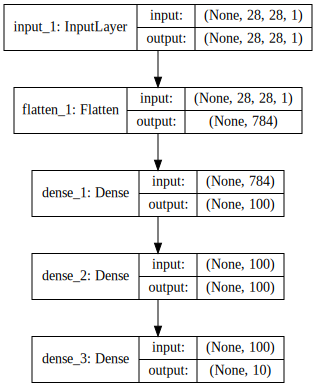

In [0]:
SVG(model_to_dot(model,True,True).create(prog='dot', format='svg'))

## Fit the CNN Model

In [0]:
cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.Adam(lr=.001),
                  metrics=['accuracy'])
cnn_model.fit(X,Y, batch_size=400, epochs=4)

Epoch 1/4
70000/70000 [==============================] - 8s 120us/step - loss: 0.1578 - acc: 0.9581
Epoch 2/4
70000/70000 [==============================] - 7s 101us/step - loss: 0.0341 - acc: 0.9899
Epoch 3/4
70000/70000 [==============================] - 7s 101us/step - loss: 0.0173 - acc: 0.9944
Epoch 4/4
70000/70000 [==============================] - 7s 101us/step - loss: 0.0128 - acc: 0.9959


### Predict Model Output


In [0]:
y_hat = cnn_model.predict(X,batch_size=400, verbose=1)

70000/70000 [==============================] - 3s 37us/step


### Plot Model Performance

Confusion matrix, without normalization


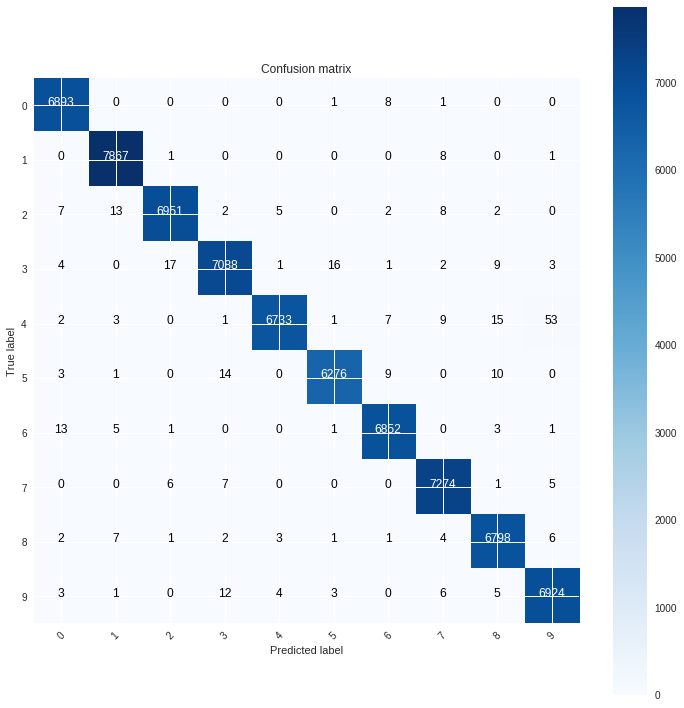

In [0]:
plot_confusion_matrix(y_, label_coder.inverse_transform(y_hat), label_coder.classes_);

# Callbacks

Keras has a convenient mechanism for taking actions in between epochs called "callbacks".  See https://keras.io/callbacks/ for details.

### Learning rate schedule
We are going to define a `LearningRateScheduler` callback, which will adjust the learning rate as we progress through epochs.

In [0]:
def lrs(epoch):
    print(f'epoch = {epoch}')
    lr = 0.001**(1+epoch/10)
    print(f'lr = {lr}')
    return lr

calls = [LearningRateScheduler(lrs)]

## Now retrain with this callback

In [0]:
cnn_model.set_weights(cnn_original_weights) # reset model
cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=keras.optimizers.Adam(lr=.001),
                  metrics=['accuracy'])
cnn_model.fit(X,Y, 
              batch_size=400, 
              epochs=4,
              validation_split=.05,
              callbacks=calls)

Train on 66500 samples, validate on 3500 samples
Epoch 1/4
epoch = 0
lr = 0.001
66500/66500 [==============================] - 8s 116us/step - loss: 0.1682 - acc: 0.9556 - val_loss: 0.0945 - val_acc: 0.9734
Epoch 2/4
epoch = 1
lr = 0.000501187233627272
66500/66500 [==============================] - 7s 103us/step - loss: 0.0263 - acc: 0.9924 - val_loss: 0.0323 - val_acc: 0.9914
Epoch 3/4
epoch = 2
lr = 0.0002511886431509581
66500/66500 [==============================] - 7s 103us/step - loss: 0.0078 - acc: 0.9981 - val_loss: 0.0270 - val_acc: 0.9929
Epoch 4/4
epoch = 3
lr = 0.0001258925411794167
66500/66500 [==============================] - 7s 103us/step - loss: 0.0037 - acc: 0.9993 - val_loss: 0.0253 - val_acc: 0.9929
